In [1]:
import numpy as np
import pandas as pd


In [58]:
from patsy import dmatrices, Treatment
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.shape  

# The shape is 400 observations from 4 variables
# gre Continuous Graduate Record Exam score
# gpa Continuous Grade Point Average
# rank Categorical Prestige of the undergraduate institution
# admit Binary Admission in graduate school

(400, 4)

In [64]:
# rename rank column
df = df.rename(columns={'rank': 'position'})
df

,admit,gre,gpa,position
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


array([[<AxesSubplot:title={'center':'admit'}>,
        <AxesSubplot:title={'center':'gre'}>],
       [<AxesSubplot:title={'center':'gpa'}>,
        <AxesSubplot:title={'center':'position'}>]], dtype=object)

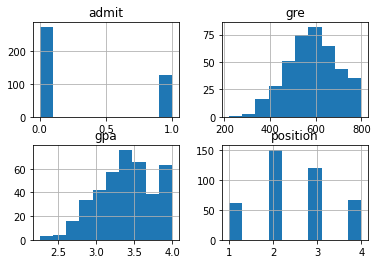

In [60]:
# Summarize
df.describe()
# plot all of the columns
df.hist()

In [61]:
## Analyze the categorical data
# Summarize
df.position.value_counts(ascending=True)

1     61
4     67
3    121
2    151
Name: position, dtype: int64

In [62]:
## Generating the crosstabulations of the data for the admission and position of the candidates
pd.crosstab(df['admit'], df['position'])

position,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [63]:
## A for loop function to check if there are missing values in the data set
for i in list(df.columns) :
    k = sum(pd.isnull(df[i]))
    print(i, k)

admit 0
gre 0
gpa 0
position 0


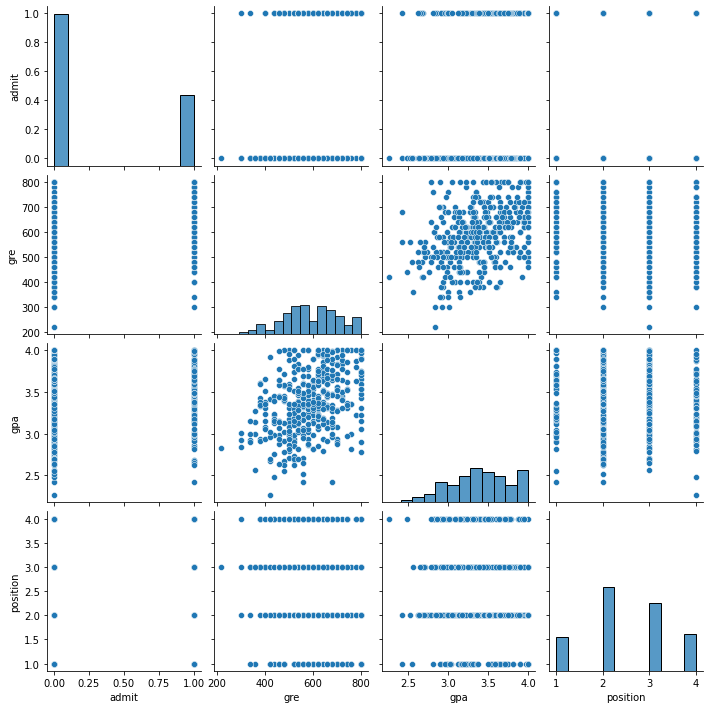

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.pairplot(df)

## In python, we can write R-style model formula y ~ x1+ x2+ x3 using patsy and statsmodels libraries. In the formula, we need to define variable 'position' as a categorical variable by mentioning it inside capital C(). You can also define reference category using reference= option.

# The logistic function 

In [33]:
y, X = dmatrices('admit ~ gre + gpa + C(position, Treatment(reference=4))', df, return_type = 'dataframe')

## Split Data into two parts
### 80% of data goes to training dataset which is used for building model and 20% goes to test dataset which would be used for validating the model.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
## Checking the shape if the train and test if it is okay
print(X_train.shape,X_test.shape);print(y_train.shape, y_test.shape)

(320, 6) (80, 6)
(320, 1) (80, 1)


## Build Logistic Regression Model

### By default, the regression without formula style does not include intercept. To include it, we already have addedintercept in X_train which would be used as a predictor.

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn import metrics
model = LinearRegression()

In [55]:
## Models coefficients
logit=model.fit(y_train, X_train)

print(logit.coef_)

[[ 0.        ]
 [ 0.16378845]
 [ 0.07879115]
 [-0.11458895]
 [37.80895845]
 [ 0.14156593]]


In [56]:
## The intercept of the model
print(logit.intercept_)

[1.00000000e+00 1.00917431e-01 3.62385321e-01 3.30275229e-01
 5.78073394e+02 3.34853211e+00]


## Viewing the coefficients as a data frame with dummy variables created

In [57]:
pd.DataFrame(logit.coef_, X.columns, columns = ['Coefficients'])

,Coefficients
Intercept,0.000000
"C(position, Treatment(reference=4))[T.1]",0.163788
"C(position, Treatment(reference=4))[T.2]",0.078791
"C(position, Treatment(reference=4))[T.3]",-0.114589
gre,37.808958
gpa,0.141566


## Making the predictions from the model we use the X_test data 

In [53]:
predictions = logit.predict(X_test)

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- C(position, Treatment(reference=4))[T.1]
- C(position, Treatment(reference=4))[T.2]
- C(position, Treatment(reference=4))[T.3]
- Intercept
- gpa
- ...
Feature names seen at fit time, yet now missing:
- admit

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but LinearRegression is expecting 1 features as input.